In [42]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manjunathainti","key":"bf164ab64c4d004775a8ab8dcda6640a"}'}

In [43]:
# Create a directory for Kaggle and move the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle API if not already installed
!pip install kaggle


In [44]:
# List available datasets to confirm access
!kaggle datasets list -s "world-happiness"

# Download the dataset
!kaggle datasets download -d unsdsn/world-happiness

# Unzip the dataset
!unzip world-happiness.zip -d world-happiness


ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
unsdsn/world-happiness                              World Happiness Report                          37KB  2019-11-27 04:41:47         312091       4186  0.85294116       
ajaypalsinghlo/world-happiness-report-2021          World Happiness Report 2021                     55KB  2021-03-22 16:51:01          77411       1357  0.9705882        
PromptCloudHQ/world-happiness-report-2019           World Happiness Report 2019                      4KB  2019-03-20 09:39:07          24509        412  1.0              
mathurinache/world-happiness-report                 World Happiness Report up to 2022               67KB  2022-03-19 10:03:15          44941     

In [46]:
#importing necessary lib
import pandas as pd
import numpy as np
import json
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
#Load and Inspect the Dataset
# Load the dataset
df = pd.read_csv('world-happiness/2019.csv')

# Display the first few rows
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [49]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [50]:
# Get statistical summary
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [57]:
# Check for missing values
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [63]:
# For simplicity, drop rows with any missing values
df_clean = df.dropna()

# Alternatively, fill missing values
# df_clean = df.fillna(method='ffill')

In [67]:
#feature eng


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [71]:
# Correct the column name to 'Score' instead of 'Happiness Score'
def categorize_happiness(score):
    if score >= 7:
        return 'Very Happy'
    elif score >= 5:
        return 'Happy'
    else:
        return 'Unhappy'

# Apply the function to the 'Score' column
df_clean['Happiness Category'] = df_clean['Score'].apply(categorize_happiness)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


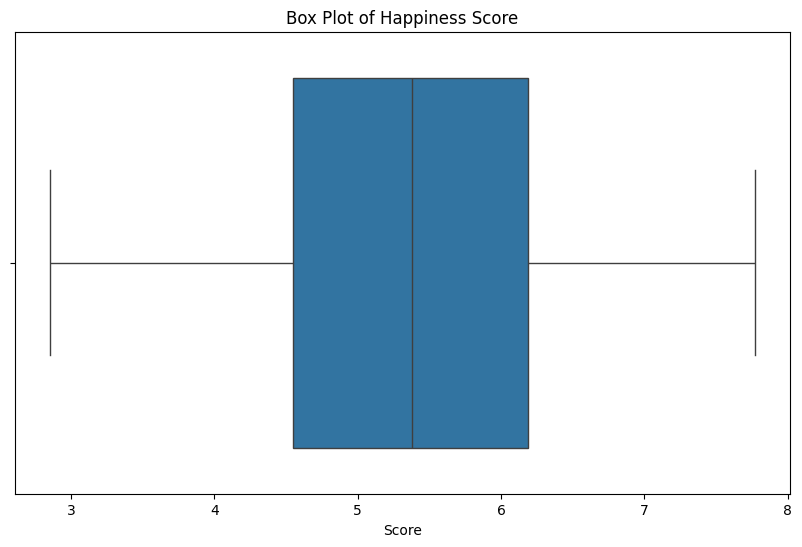

In [73]:
# Box plot for Happiness Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Score'])
plt.title('Box Plot of Happiness Score')
plt.show()


In [76]:
# Removing outliers beyond 1.5*IQR
Q1 = df_clean['Score'].quantile(0.25)
Q3 = df_clean['Score'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_clean[~((df_clean['Score'] < (Q1 - 1.5 * IQR)) | (df_clean['Score'] > (Q3 + 1.5 * IQR)))]


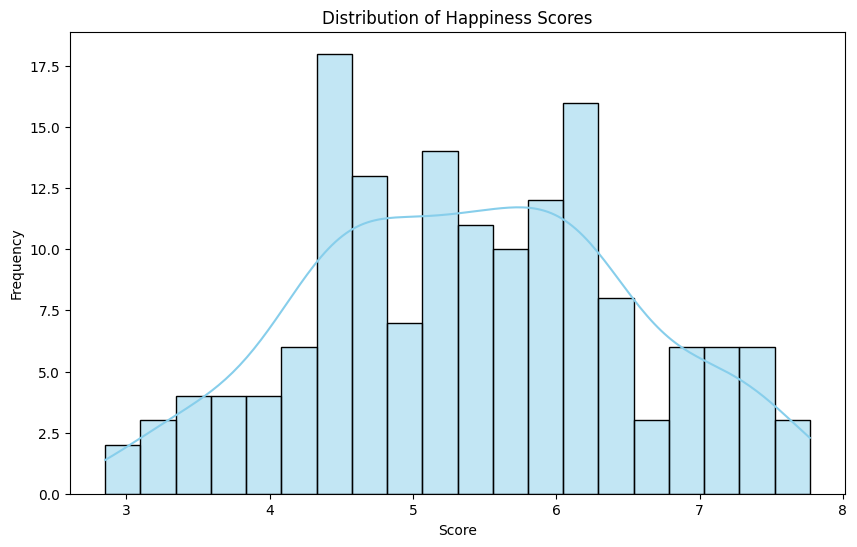

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-80-1fe813b45816>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['GDP per capita'], shade=True, color='green')


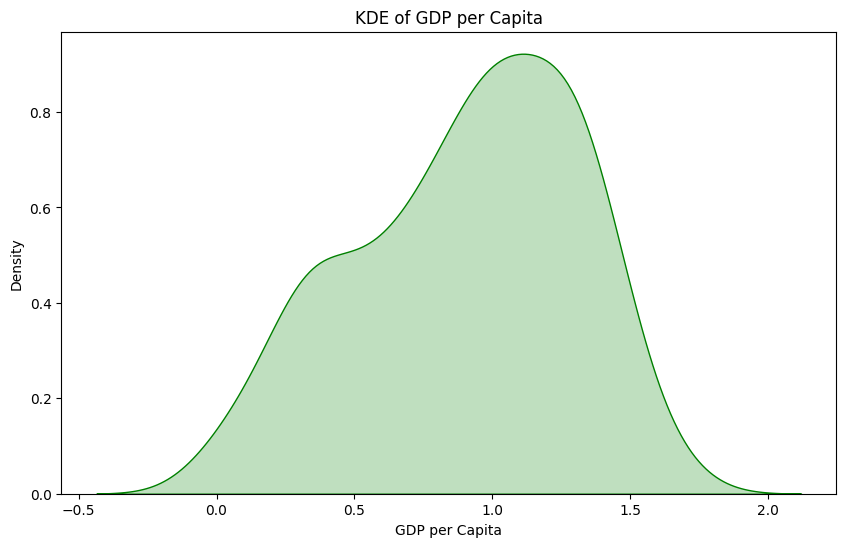

In [80]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_clean['GDP per capita'], shade=True, color='green')
plt.title('KDE of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.show()


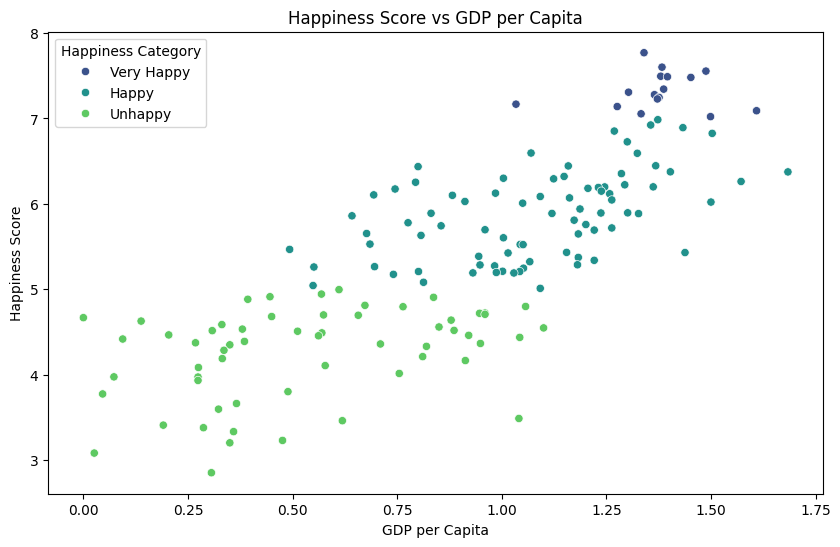

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', data=df_clean, hue='Happiness Category', palette='viridis')
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


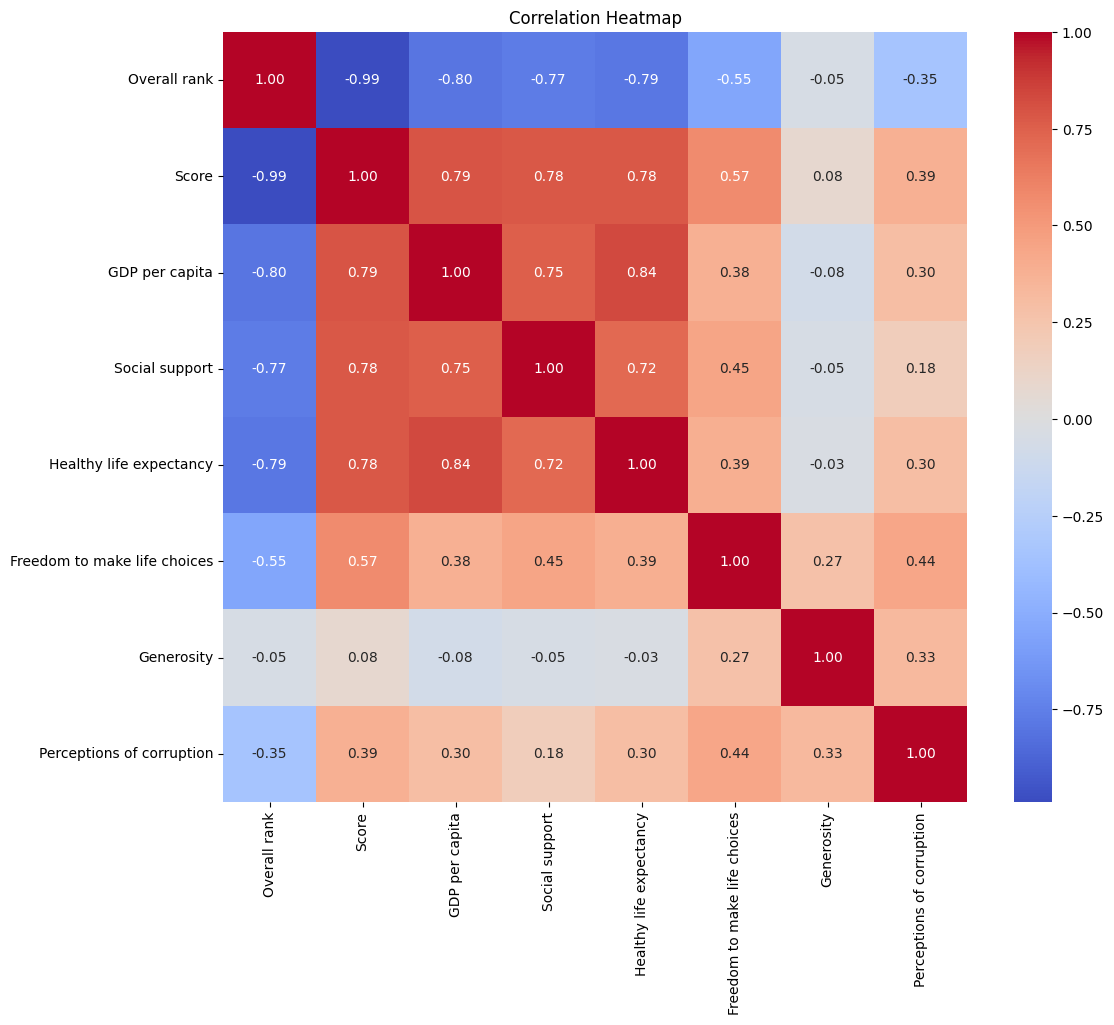

In [84]:
# Select only numeric columns from the dataset
numeric_df = df_clean.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Convert the DataFrame to JSON format suitable for D3.js.

In [86]:
# Select relevant columns for visualization
# Verify the correct column names from the DataFrame
d3_data = df_clean[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Convert to JSON
d3_json = d3_data.to_json(orient='records')


In [91]:
#Interactive Bar Chart
# Assume 'df_clean' already has the required data for visualization
d3_data = df_clean[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Convert DataFrame to JSON format suitable for D3.js
d3_json = d3_data.to_json(orient='records')

from IPython.core.display import display, HTML

# HTML and D3.js code for an interactive bar chart using correct column names
bar_chart_html = f"""
<!DOCTYPE html>
<meta charset="utf-8">
<style>
  body {{
    font-family: Arial, sans-serif;
  }}
  .bar {{
    fill: steelblue;
  }}
  .bar:hover {{
    fill: orange;
  }}
  .axis-label {{
    font-size: 12px;
  }}
</style>
<body>
  <h2>Score by Overall Rank</h2>
  <svg width="1000" height="600"></svg>

  <script src="https://d3js.org/d3.v6.min.js"></script>
  <script>
    const data = {d3_json};  // Data from Python passed as JSON

    const svg = d3.select("svg"),
          margin = {{top: 20, right: 30, bottom: 70, left: 60}},
          width = +svg.attr("width") - margin.left - margin.right,
          height = +svg.attr("height") - margin.top - margin.bottom;

    const g = svg.append("g").attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // X axis (Overall Rank)
    const x = d3.scaleBand()
                .range([0, width])
                .domain(data.map(d => d['Overall rank']))  // Using 'Overall rank' from the DataFrame
                .padding(0.2);
    g.append("g")
     .attr("transform", "translate(0," + height + ")")
     .call(d3.axisBottom(x))
     .selectAll("text")
       .attr("transform", "rotate(-45)")
       .style("text-anchor", "end");

    // Y axis (Score)
    const y = d3.scaleLinear()
                .domain([0, d3.max(data, d => d['Score']) + 1])  // Using 'Score' from the DataFrame
                .range([height, 0]);
    g.append("g")
     .call(d3.axisLeft(y));

    // Bars for the chart
    g.selectAll(".bar")
     .data(data)
     .enter()
     .append("rect")
       .attr("class", "bar")
       .attr("x", d => x(d['Overall rank']))  // Using 'Overall rank' for X
       .attr("y", d => y(d['Score']))  // Using 'Score' for Y
       .attr("width", x.bandwidth())
       .attr("height", d => height - y(d['Score']))
       .on("mouseover", function(event, d) {{
           d3.select(this).attr("fill", "orange");
       }})
       .on("mouseout", function(event, d) {{
           d3.select(this).attr("fill", "steelblue");
       }});
  </script>
</body>
"""

# Display the bar chart with the corrected code
display(HTML(bar_chart_html))


In [94]:
#Interactive Scatter Plot Matrix
# HTML and D3.js code for an interactive scatter plot using correct column names
scatter_plot_html = f"""
<!DOCTYPE html>
<meta charset="utf-8">
<style>
  body {{
    font-family: Arial, sans-serif;
  }}
  .dot {{
    stroke: #000;
  }}
  .axis-label {{
    font-size: 12px;
  }}
</style>
<body>
  <h2>Happiness Score vs GDP per Capita</h2>
  <svg width="800" height="600"></svg>

  <script src="https://d3js.org/d3.v6.min.js"></script>
  <script>
    const data = {d3_json};

    const svg = d3.select("svg"),
          margin = {{top: 20, right: 30, bottom: 70, left: 60}},
          width = +svg.attr("width") - margin.left - margin.right,
          height = +svg.attr("height") - margin.top - margin.bottom;

    const g = svg.append("g").attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // X scale (GDP per capita)
    const x = d3.scaleLinear()
                .domain([0, d3.max(data, d => d['GDP per capita']) + 1])  // Correct column name for X
                .range([0, width]);

    g.append("g")
     .attr("transform", "translate(0," + height + ")")
     .call(d3.axisBottom(x));

    // Y scale (Happiness Score)
    const y = d3.scaleLinear()
                .domain([0, d3.max(data, d => d['Score']) + 1])  // Correct column name for Y
                .range([height, 0]);
    g.append("g")
     .call(d3.axisLeft(y));

    // Tooltip
    const tooltip = d3.select("body").append("div")
        .attr("class", "tooltip")
        .style("position", "absolute")
        .style("background-color", "white")
        .style("padding", "5px")
        .style("border", "1px solid #000")
        .style("border-radius", "5px")
        .style("visibility", "hidden");

    // Dots
    g.selectAll(".dot")
     .data(data)
     .enter().append("circle")
       .attr("class", "dot")
       .attr("cx", d => x(d['GDP per capita']))  // Use correct X-axis variable
       .attr("cy", d => y(d['Score']))  // Use correct Y-axis variable
       .attr("r", 5)
       .attr("fill", "steelblue")
       .on("mouseover", function(event, d) {{
           tooltip.html("<strong>Overall Rank:</strong> " + d['Overall rank'] + "<br><strong>Happiness Score:</strong> " + d['Score'] + "<br><strong>GDP per Capita:</strong> " + d['GDP per capita'])
                  .style("visibility", "visible");
       }})
       .on("mousemove", function(event) {{
           tooltip.style("top", (event.pageY-10)+"px").style("left",(event.pageX+10)+"px");
       }})
       .on("mouseout", function(d) {{
           tooltip.style("visibility", "hidden");
       }});
  </script>
</body>
"""

# Display the scatter plot with the corrected code
display(HTML(scatter_plot_html))


In [113]:
# Corrected version with escaped backticks in Python f-string
world_map_html = f"""
<!DOCTYPE html>
<meta charset="utf-8">
<style>
  body {{
    font-family: Arial, sans-serif;
  }}
  .country {{
    fill: #ccc;
    stroke: #333;
    stroke-width: 0.5px;
  }}
  .country:hover {{
    fill: orange;
  }}
  .tooltip {{
    position: absolute;
    text-align: center;
    width: auto;
    height: auto;
    padding: 5px;
    font: 12px sans-serif;
    background: lightsteelblue;
    border: 0px;
    border-radius: 8px;
    pointer-events: none;
  }}
</style>
<body>
  <h2>World Happiness Map</h2>
  <svg width="960" height="600"></svg>

  <script src="https://d3js.org/d3.v6.min.js"></script>
  <script src="https://d3js.org/topojson.v2.min.js"></script>
  <script>
    const happinessData = {d3_json};

    // Prepare a map from country name to happiness score
    const happinessMap = {{}};
    happinessData.forEach(d => {{
      happinessMap[d['Country or region']] = +d['Score'];
    }});

    const svg = d3.select("svg"),
          width = +svg.attr("width"),
          height = +svg.attr("height");

    const projection = d3.geoMercator()
                         .scale(150)
                         .translate([width / 2, height / 1.5]);

    const path = d3.geoPath().projection(projection);

    const tooltip = d3.select("body").append("div")
        .attr("class", "tooltip")
        .style("visibility", "hidden");

    // Color scale
    const color = d3.scaleSequential(d3.interpolateYlGnBu)
                    .domain([d3.min(happinessData, d => d['Score']),
                             d3.max(happinessData, d => d['Score'])]);

    // Load and display the World
    d3.json("https://raw.githubusercontent.com/holtzy/D3-graph-gallery/master/DATA/world.geojson").then(function(world) {{

      svg.append("g")
         .selectAll("path")
         .data(world.features)
         .enter().append("path")
           .attr("d", path)
           .attr("class", "country")
           .attr("fill", function(d) {{
             const countryName = d.properties.name;
             const score = happinessMap[countryName];
             return score ? color(score) : "#ccc";
           }})
           .on("mouseover", function(event, d) {{
             const country = d.properties.name;
             const score = happinessMap[country] ? happinessMap[country] : "No data";
             tooltip.html("<strong>Country:</strong> " + country + "<br><strong>Happiness Score:</strong> " + score)
                    .style("visibility", "visible");
           }})
           .on("mousemove", function(event) {{
             tooltip.style("top", (event.pageY-10)+"px").style("left",(event.pageX+10)+"px");
           }})
           .on("mouseout", function() {{
             tooltip.style("visibility", "hidden");
           }});

      // Add legend
      const legendWidth = 300, legendHeight = 10;

      const legendSvg = svg.append("g")
                           .attr("class", "legend")
                           .attr("transform", `translate(${{width - legendWidth - 50}}, ${{height - 30}})`);

      const legendScale = d3.scaleLinear()
                            .domain(color.domain())
                            .range([0, legendWidth]);

      const legendAxis = d3.axisBottom(legendScale)
                           .ticks(5);

      const legendGradient = svg.append("defs")
                                 .append("linearGradient")
                                 .attr("id", "legend-gradient")
                                 .attr("x1", "0%")
                                 .attr("y1", "0%")
                                 .attr("x2", "100%")
                                 .attr("y2", "0%");

      legendGradient.selectAll("stop")
                    .data(d3.range(0, 1.01, 0.01))
                    .enter().append("stop")
                      .attr("offset", d => d * 100 + "%")
                      .attr("stop-color", d => color(d3.interpolateNumber(...color.domain())(d)));

      legendSvg.append("rect")
               .attr("width", legendWidth)
               .attr("height", legendHeight)
               .style("fill", "url(#legend-gradient)");

      legendSvg.append("g")
               .attr("transform", `translate(0, ${{legendHeight}})`)
               .call(legendAxis)
               .select(".domain").remove();

      legendSvg.append("text")
               .attr("x", legendWidth / 2)
               .attr("y", -10)
               .attr("text-anchor", "middle")
               .text("Happiness Score");

    }});
  </script>
</body>
"""

# Display the world map in Colab
from IPython.core.display import display, HTML
display(HTML(world_map_html))


In [114]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Create a sample DataFrame, assuming you have the columns 'Country', 'Happiness Score', 'GDP per Capita'
df_clean = pd.DataFrame({
    'Country': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
    'Happiness Score': [7.1, 5.5, 6.2, 4.9, 7.5],
    'GDP per Capita': [1.1, 2.2, 1.9, 1.4, 3.2]
})

# Add a dummy 'Population' column if it doesn't exist
df_clean['Population'] = np.random.randint(1_000_000, 100_000_000, size=len(df_clean))

# Convert the DataFrame to JSON format suitable for D3.js
d3_data_bubble = df_clean[['Country', 'Happiness Score', 'GDP per Capita', 'Population']].to_json(orient='records')


In [116]:
# Updated D3.js HTML Template with background and axis labels
bubble_chart_html = f"""
<!DOCTYPE html>
<meta charset="utf-8">
<style>
  body {{
    font-family: Arial, sans-serif;
  }}
  .bubble {{
    stroke: #000;
    stroke-width: 1px;
    opacity: 0.7;
  }}
  .tooltip {{
    position: absolute;
    text-align: center;
    width: auto;
    height: auto;
    padding: 5px;
    font: 12px sans-serif;
    background: lightsteelblue;
    border: 0px;
    border-radius: 8px;
    pointer-events: none;
  }}
  svg {{
    background-color: white;  /* White background */
  }}
</style>
<body>
  <h2>Happiness Score vs GDP per Capita (Bubble Size: Population)</h2>
  <svg width="800" height="600"></svg>

  <script src="https://d3js.org/d3.v6.min.js"></script>
  <script>
    const data = {d3_data_bubble};

    const svg = d3.select("svg"),
          margin = {{top: 20, right: 30, bottom: 70, left: 60}},
          width = +svg.attr("width") - margin.left - margin.right,
          height = +svg.attr("height") - margin.top - margin.bottom;

    const g = svg.append("g").attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    // X scale
    const x = d3.scaleLinear()
                .domain([0, d3.max(data, d => d['GDP per Capita']) + 1])
                .range([0, width]);

    g.append("g")
     .attr("transform", "translate(0," + height + ")")
     .call(d3.axisBottom(x));

    // Y scale
    const y = d3.scaleLinear()
                .domain([0, d3.max(data, d => d['Happiness Score']) + 1])
                .range([height, 0]);
    g.append("g")
     .call(d3.axisLeft(y));

    // X Axis Label
    g.append("text")
     .attr("class", "axis-label")
     .attr("x", width / 2)
     .attr("y", height + 50)  // Positioned below the axis
     .style("text-anchor", "middle")
     .text("GDP per Capita");

    // Y Axis Label
    g.append("text")
     .attr("class", "axis-label")
     .attr("x", -height / 2)
     .attr("y", -40)  // Positioned to the left of the axis
     .attr("transform", "rotate(-90)")
     .style("text-anchor", "middle")
     .text("Happiness Score");

    // Size scale
    const size = d3.scaleSqrt()
                   .domain([0, d3.max(data, d => d['Population'])])
                   .range([5, 40]);

    // Tooltip
    const tooltip = d3.select("body").append("div")
        .attr("class", "tooltip")
        .style("visibility", "hidden");

    // Bubbles
    g.selectAll(".bubble")
     .data(data)
     .enter().append("circle")
       .attr("class", "bubble")
       .attr("cx", d => x(d['GDP per Capita']))
       .attr("cy", d => y(d['Happiness Score']))
       .attr("r", d => size(d['Population']))
       .attr("fill", "steelblue")
       .on("mouseover", function(event, d) {{
           tooltip.html("<strong>Country:</strong> " + d.Country + "<br><strong>Happiness Score:</strong> " + d['Happiness Score'] + "<br><strong>GDP per Capita:</strong> " + d['GDP per Capita'] + "<br><strong>Population:</strong> " + d['Population'].toLocaleString())
                  .style("visibility", "visible");
       }})
       .on("mousemove", function(event) {{
           tooltip.style("top", (event.pageY-10)+"px").style("left",(event.pageX+10)+"px");
       }})
       .on("mouseout", function() {{
           tooltip.style("visibility", "hidden");
       }});
  </script>
</body>
"""

# Display the bubble chart
display(HTML(bubble_chart_html))
